### Enhancing Stroke Prediction

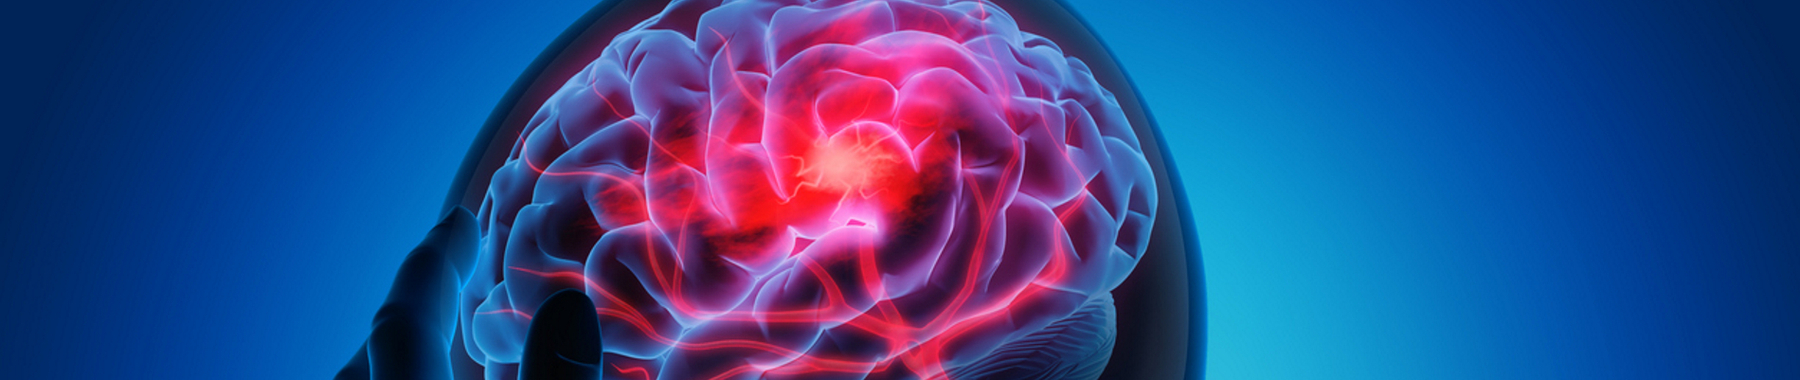

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
I am saying this, especially for the particular dataset because I have witnessed these case with my own relative. There always wanted to learn about it. Now, with this assignment I will get a chance to work on the healthcare dataset and at the same time I can get knowledge of it.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.I will follow all the machine learning pipeline in this assignment including Data Preprocessing, Feature Selection using statistical tests, and Model selection using random forest, to check which models fit perfectly with the data. Although the data is small we will get an idea about the proper Machine Learning Healthcare project.

**Data Source:** The dataset (Stroke Prediction Dataset) is publicly available on Kaggle.

**URL:** https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [1]:
#inmport necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report)

In [2]:
stroke_Df = pd.read_csv('/content/stroke_dataset.csv')
stroke_Df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_Df.shape

(5110, 12)

##**EDA (Exploratory Data Analysis)**

In [4]:
stroke_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset contains 10 features excluding id and stroke column Which will apply statistical tests to determine the significance of each feature in predicting the occurrence of a stroke.

In [5]:
stroke_Df.duplicated().sum()

0

In [6]:
stroke_Df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


As we found, 201 missing values in bmi column which means 201 people don't have bmi recorded. We need to fill the missing values, Let's see the difference by using box plot.

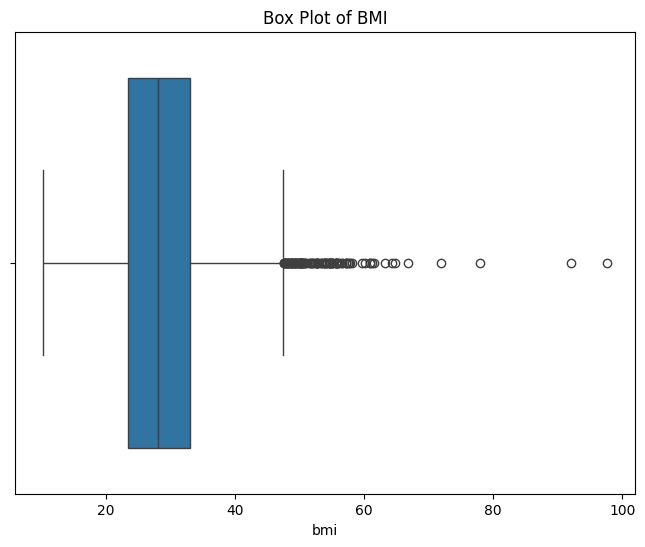

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi', data=stroke_Df)
plt.title('Box Plot of BMI')
plt.show()

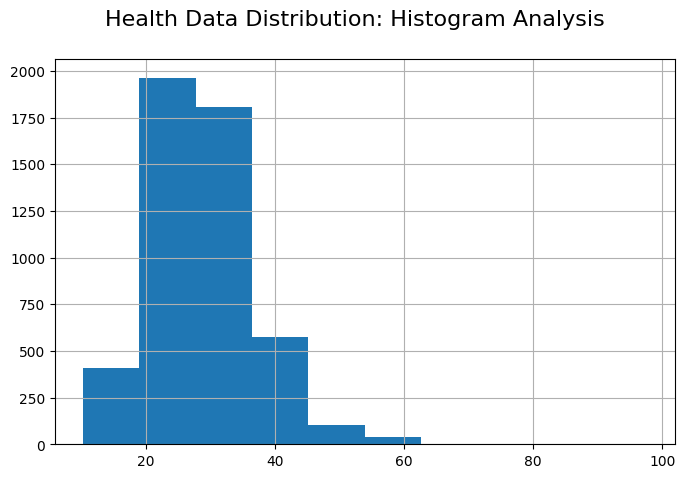

In [8]:
stroke_Df['bmi'].hist(figsize=(8,5))
plt.suptitle('Health Data Distribution: Histogram Analysis', fontsize=16)
plt.show()

Let's fill those missing values with the median. The reason behind choosing the median to fill the blanks is unlike the average (mean), the median isn’t affected much by extremely high or low values.
Filling in missing values with the median helps keep the overall distribution of BMI values similar to what it was before filling in the gaps.

In [9]:
stroke_Df['bmi'].fillna(stroke_Df['bmi'].median(), inplace=True)

<ipython-input-9-4fc5a2d2a497>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_Df['bmi'].fillna(stroke_Df['bmi'].median(), inplace=True)


In [10]:
stroke_Df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


### Data Visualization to understand the dataset in detail:

<Axes: xlabel='work_type', ylabel='count'>

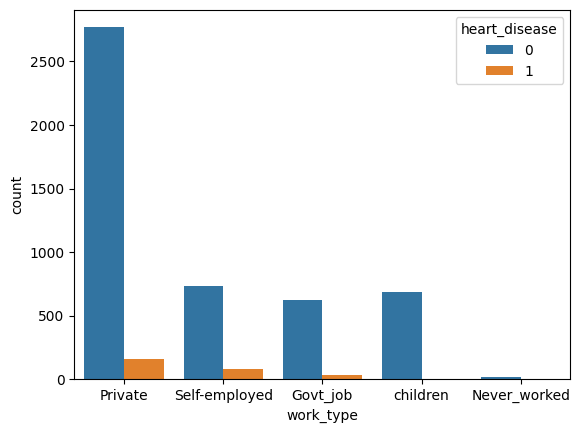

In [11]:
# I wanted to check the work status of the people who has heart disease.
sns.countplot(x = 'work_type',hue='heart_disease' ,data=stroke_Df)

People who work in the private sector or are self-employed often experience a high rate of stroke. The higher the position, the more mental stress one may endure.

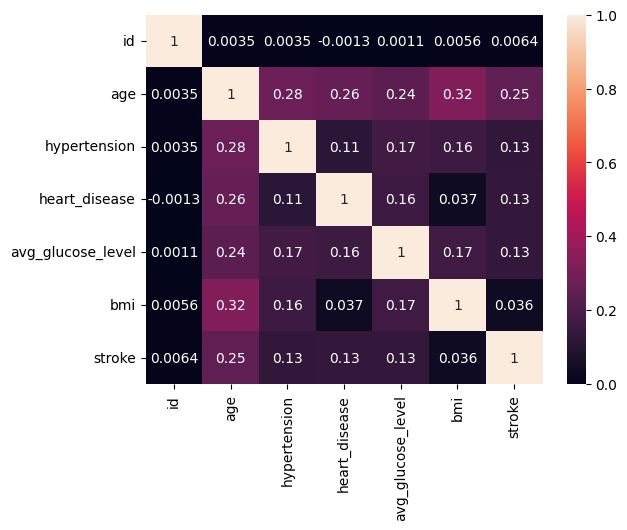

In [12]:
sns.heatmap(stroke_Df.corr(numeric_only=True),annot=True)
plt.show()

From the result, age moderate positively correlated with risk of stroke with correlation coefficient 0.245 therefore elderly may be at higher risk. But also hypertension and heart disease are associated with age suggesting that these can be factors in increasing the risk for stoke.

<Axes: xlabel='Residence_type', ylabel='stroke'>

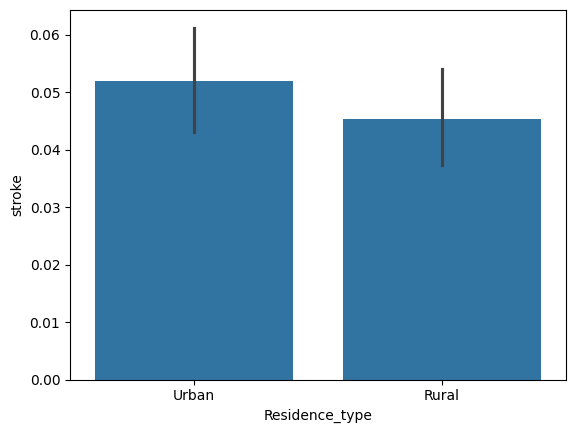

In [13]:
sns.barplot(x='Residence_type',y='stroke' ,data=stroke_Df)

As expected, people who live in urban areas have a large number of strokes.

### Feature Selection Process:

Theoretically, if we have categorical and Binary features, **Chi-square test** is the best option to use to see if there's a relationship between these categories and having a stroke. If we have Numerical features T-test and Man-Whitney U test are appropriate to use. If our data is normally distributed, we should use T-test, and if the data is not normally distributed then we can go with the Man-Whitney U test.

It's also important to check p-value and find which feature/factors are highly important in predicting a stroke. If it has low p-value which means less than 0.05 then they are most likely to predict the stroke, and if it is greater than 0.05 then it is not important or strong enough to predict the stroke.




*   **Numerical Features:** age, avg_glucose_level, bmi
*   **Binary Features:** hypertension, heart_disease

*   **Categorical Features:** gender, ever_married, work_type,Residence_type, smoking_status









## **Statistical tests:**


---


*   Chi-Square Test for Categorical and Binary Features:



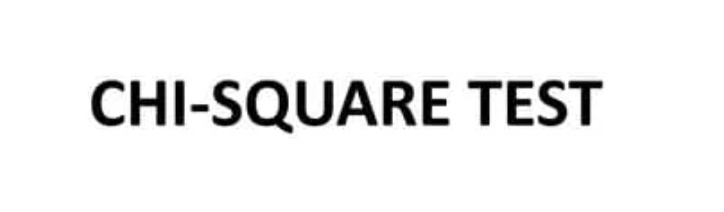

The Chi-Square Test of Independence is statistical test which is used where the hypothesis states that there are no significant relationship between two variables which are groups of numerical data or categorical data. In our dataset, we’re testing if genders, work types, etc., are linked to a stroke.

In [14]:
from scipy.stats import chi2_contingency
def chi_square_test(variable):
    contingency_table = pd.crosstab(stroke_Df[variable], stroke_Df['stroke'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return p

In [15]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']
chi2_results = {}

In [16]:
for variable in categorical_features:
    p_value = chi_square_test(variable)
    chi2_results[variable] = p_value

chi2_results

{'gender': 0.7895490538408245,
 'ever_married': 1.6389021142314745e-14,
 'work_type': 5.397707801896119e-10,
 'Residence_type': 0.29833169286876987,
 'smoking_status': 2.0853997025008455e-06,
 'hypertension': 1.661621901511823e-19,
 'heart_disease': 2.0887845685229236e-21}

Visually let's see  which features are greater than p-value which means > 0.05

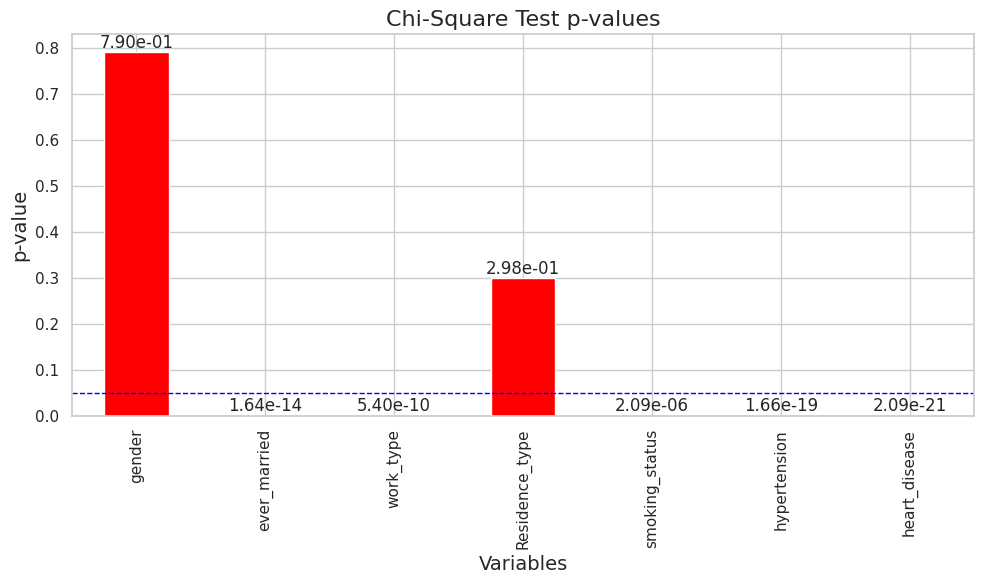

In [17]:
chiSquare_series = pd.Series(chi2_results)
sns.set(style="whitegrid")
colors = ['green' if p < 0.05 else 'red' for p in chiSquare_series]
plt.figure(figsize=(10, 6))
chiSquare_series.plot(kind='bar', color=colors)
plt.axhline(y=0.05, color='blue', linestyle='--', linewidth=1)
plt.title('Chi-Square Test p-values', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('p-value', fontsize=14)
for index, value in enumerate(chiSquare_series):
    plt.text(index, value + 0.01, f"{value:.2e}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

## **Significant Features (p-value < 0.05):**

*   ever_married
*   work_type

*   smoking_status

*   hypertension
*   heart_disease

These features are likely related to whether someone has a stroke.



## **Non-Significant Features (p-value ≥ 0.05):**



*   gender
*   Residence_type



These features are not significantly related to strokes in  dataset. They do not provide useful information for predicting strokes.






---


*   T-Test / Mann-Whitney U Test for Numerical Features:



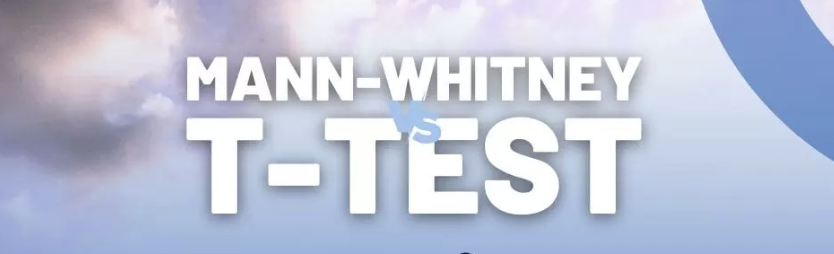

In [18]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

In [19]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

In [20]:
t_test_res = {}
mannwhitney_res = {}
for variable in numerical_features:
    grp1 = stroke_Df[stroke_Df['stroke'] == 1][variable]
    grp2 = stroke_Df[stroke_Df['stroke'] == 0][variable]
    stat1, p1 = shapiro(grp1)
    stat2, p2 = shapiro(grp2)

    if p1 > 0.05 and p2 > 0.05:
        # If feature is Normally distributed, it will use T-Test
        stat, p = ttest_ind(grp1, grp2, equal_var=False)
        t_test_res[variable] = p
    else:
        # Not normally distributed, it will use Mann-Whitney U Test
        stat, p = mannwhitneyu(grp1, grp2)
        mannwhitney_res[variable] = p

In [21]:
t_test_res, mannwhitney_res

({},
 {'age': 3.726634665900011e-71,
  'avg_glucose_level': 3.6403672710893236e-09,
  'bmi': 0.00027690391864726487})

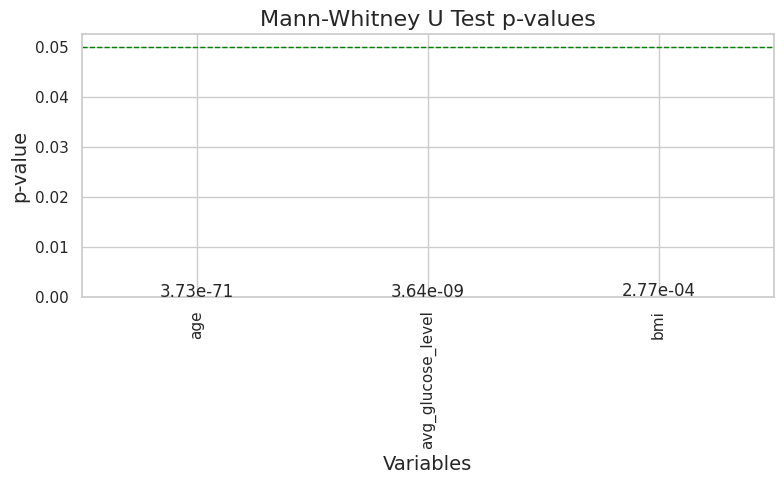

In [22]:
mannwhitney_series = pd.Series(mannwhitney_res)
colors = ['green' if p < 0.05 else 'red' for p in mannwhitney_series]
plt.figure(figsize=(8, 5))
mannwhitney_series.plot(kind='bar', color=colors)
plt.axhline(y=0.05, color='green', linestyle='--', linewidth=1)
plt.title('Mann-Whitney U Test p-values', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('p-value', fontsize=14)
for index, value in enumerate(mannwhitney_series):
    plt.text(index, value + 0.00001, f"{value:.2e}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

## **Significant Features (p-value < 0.05):**

**Features to Include:**



*   age

*   avg_glucose_level

*   bmi

Additionally, **from Chi-Square results,** include:

*   ever_married

*   work_type
*   smoking_status


*   hypertension


*   heart_disease


**Non-Significant Features including Chi-Square results(p-value > 0.05) :**



*   gender
*   Residence_type

These features didn't show significant important with the outcome and may not contribute meaningfully to our model.

If the actual analysis was focused on two groups for instance in this case stroke and no stroke , **ANOVA test** could not have been useful because it is more suited to three or more groups. In this case the common technique that should be used is a T-test or Mann-Whitney U Test.

If we are not performing the check for equal variances (using **Levene’s Test**) then we will not need to do this for two group comparisons.



---



## **Machine Learning Algorithms:**


In [23]:
X = stroke_Df.drop(['id', 'stroke', 'gender', 'Residence_type'], axis=1)
y = stroke_Df['stroke']

In [24]:
#Encoding
X = pd.get_dummies(X, drop_first=True)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [26]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



---


###1. SVM

In [27]:
# Setting up the SVM model
svm_model = SVC(probability=True, random_state=42)

In [28]:
# Training the SVM model
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [29]:
svm_pred = svm_model.predict(X_test)

In [30]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nEvaluation Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


Evaluation Metrics for Support Vector Machine:
Accuracy: 0.9471624266144814
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       1.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.97      0.50      0.49      1022
weighted avg       0.95      0.95      0.92      1022



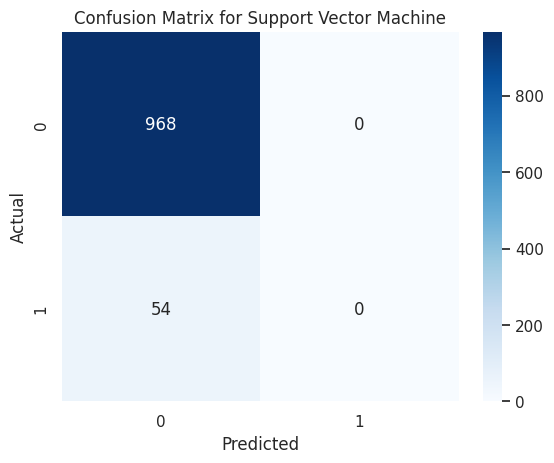

In [31]:
evaluate_model(y_test, svm_pred, 'Support Vector Machine')


##2. **RandomForest:**
The reason behind selecting RandomeForest is it handles both numbers and categories well? It can capture complex patterns in the data. It's less likely to make mistakes compared to simpler models.

In [33]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
GSC_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
GSC_rf.fit(X_train, y_train)
best_parameteres_rf = GSC_rf.best_params_
print("Best Hyperparameters for RandomForest model are:", best_parameteres_rf)

Best Hyperparameters for RandomForest model are: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [34]:
rf = RandomForestClassifier(bootstrap= True, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [35]:
rf_pred = rf.predict(X_test)


Evaluation Metrics for Random Forest:
Accuracy: 0.9452054794520548
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



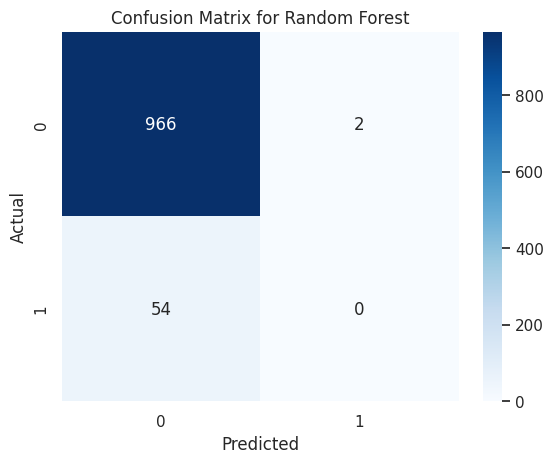

In [36]:
evaluate_model(y_test, rf_pred, 'Random Forest')

<ipython-input-37-e8a4250ea843>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(stroke_Df['stroke'], hist=False, color="r", label="Actual Value")
<ipython-input-37-e8a4250ea843>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_pred, hist=False, color="b", label="Predic

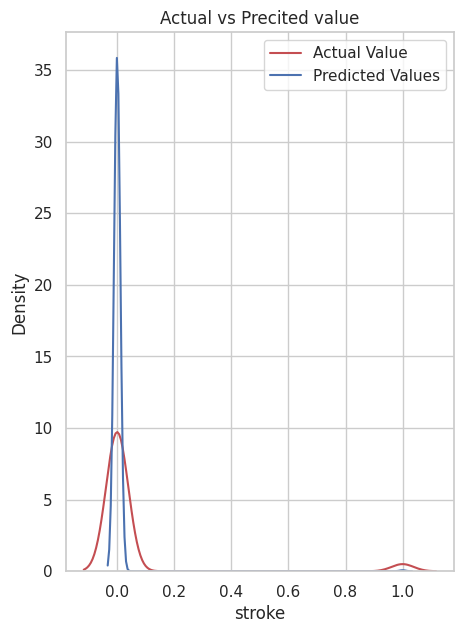

In [37]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(stroke_Df['stroke'], hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Predicted Values")
plt.title('Actual vs Precited value')
plt.legend()
plt.show()
plt.close()

##2. **KNN**


KNN algorithm is a good choice if you have a small dataset and the data is noise-free and labeled. When the data set is small, the classifier completes execution in shorter time duration.



StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale.



In [38]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 25],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
GSC_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
GSC_knn.fit(X_train, y_train)
best_parameteresKNN = GSC_knn.best_params_
print("Best Hyperparameters for KNN are:", best_parameteresKNN)

Best Hyperparameters for KNN are: {'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}


In [39]:
classifier = KNeighborsClassifier(n_neighbors= 1, p= 2, weights= 'uniform')
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
knn_pred =  classifier.predict(X_test)


Evaluation Metrics for K Nearest Neighbors:
Accuracy: 0.9168297455968689
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       968
           1       0.17      0.15      0.16        54

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.56      1022
weighted avg       0.91      0.92      0.91      1022



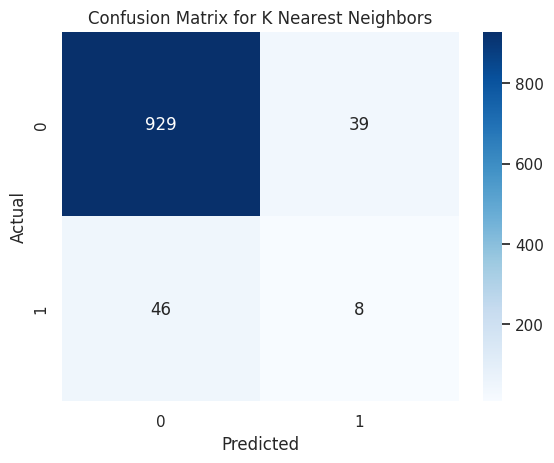

In [41]:
evaluate_model(y_test, knn_pred, 'K Nearest Neighbors')

<ipython-input-42-5da77c7b3789>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(stroke_Df['stroke'], hist=False, color="r", label="Actual Value")
<ipython-input-42-5da77c7b3789>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(knn_pred, hist=False, color="b", label="Predi

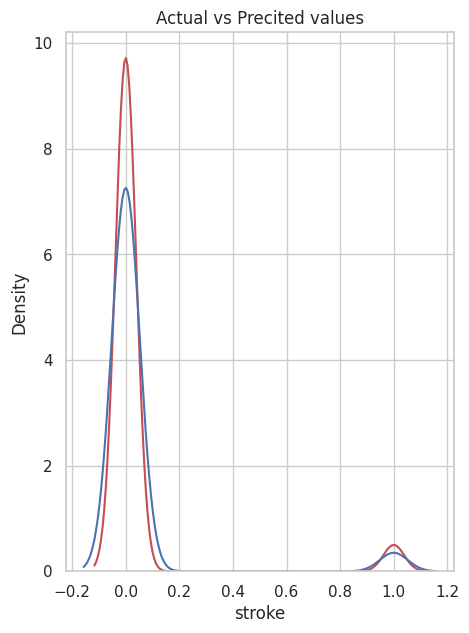

In [42]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(stroke_Df['stroke'], hist=False, color="r", label="Actual Value")
sns.distplot(knn_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited values')
plt.show()
plt.legend()
plt.close()

## Conclusion:


---



The model shows a high accuracy up to 94% because it has  a vast number of non-stroke cases (TN = 960).
However, the recall is very low, only 1.6% which means that this model catches only one out of 62 actual positive cases of strokes.

This might be due to data bias where non-stroke cases dominate the dataset much than stroke cases, the model is likely to predict non-stroke cases easily, but will find it hard to predict stroke cases.
In conclusion, the confusion matrix gives and detailed view of how well the model has performed by diagnosing areas of the model's performance to make further adjustments or improvements.

In this predictive analysis of the Stroke Prediction Dataset, various key areas I have implemented such as the feature selection via statistical tests as well as the Random Forest Classifier Machine Learning Model and further performance assessment through good and reliable performance metrics. The high degree of correlation of all the selected characteristics with stroke indicates that risks are not unique but are multiple. Although the Random Forest model is impressive, including high ROC-AUC, there is an opportunity to increase the overall Recall not to miss critical cases. The future work may be done to employ methods like class balancing, more hyperparameters optimization or other algorithms to improve model results.
